*   **예선 당일 코드는 마크다운으로 설명된대로 실행하시면 됩니다!!!**
*   **주석 해제 여부를 체크하시고 실행하면 됩니다!**
*   **아래의 모든 코드는 예선에 맞게 수정된 코드로 모두 실행하시면 됩니다.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 코드 최초 실행시 주석해제하여 설치
! pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import sys
import cv2
from PIL import Image
from imageio.v3 import imread
import matplotlib.pyplot as plt
import torch
import shutil
from tqdm import tqdm
import time
import gc
import joblib
import psutil
import rembg

use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")
    device = torch.device('cuda')
else:
    print("Using CPU")
    device = torch.device('cpu')

Using CPU


In [4]:
main_dir = "/content/drive/MyDrive/CJ대한통운 미래기술챌린지 2023"
labeledimg_dir="/content/drive/MyDrive/CJ대한통운 미래기술챌린지 2023/상품매핑"
train_dir="/content/drive/MyDrive/CJ대한통운 미래기술챌린지 2023/상품매핑TrainTestFolder/train"
test_dir="/content/drive/MyDrive/CJ대한통운 미래기술챌린지 2023/상품매핑TrainTestFolder/test"

pr_train = "/content/drive/MyDrive/CJ대한통운 미래기술챌린지 2023/상품매핑PreprocessedFolder/train"
pr_test = "/content/drive/MyDrive/CJ대한통운 미래기술챌린지 2023/상품매핑PreprocessedFolder/test"
image_preprocessing_tool_dir="/content/drive/MyDrive/CJ대한통운 미래기술챌린지 2023/image_preprocessing"
backbone_dir="/content/drive/MyDrive/CJ대한통운 미래기술챌린지 2023/backbonefolder"

In [7]:
sys.path.append(image_preprocessing_tool_dir)
from Splitandmakedir import split_data, make_dir
from getpreprocessedimage import getnukki, showimagesinarow, allimagepreprocessing

In [6]:
data = []
for filename in os.listdir(train_dir):
    filepath = os.path.join(train_dir, filename)
    filepath = filepath.split('/train/')[1]
    label = filename.split(')')[0]
    data.append({'Filepath': filepath, 'label': label})

df = pd.DataFrame(data)
df
df.to_csv(os.path.join(image_preprocessing_tool_dir, 'trainfolderimages.csv'))

Show image progress:   0%|                                                    | 0/6 [00:00<?, ?it/s]Downloading data from 'https://github.com/danielgatis/rembg/releases/download/v0.0.0/u2net.onnx' to file '/root/.u2net/u2net.onnx'.

  0%|                                               | 0.00/176M [00:00<?, ?B/s]
  0%|▏                                      | 738k/176M [00:00<00:23, 7.36MB/s]
  1%|▍                                     | 2.20M/176M [00:00<00:14, 11.6MB/s]
  3%|█                                     | 4.71M/176M [00:00<00:09, 17.8MB/s]
  5%|█▊                                    | 8.37M/176M [00:00<00:06, 25.2MB/s]
  9%|███▎                                  | 15.2M/176M [00:00<00:03, 40.9MB/s]
 13%|████▊                                 | 22.3M/176M [00:00<00:03, 50.8MB/s]
 16%|██████▏                               | 28.9M/176M [00:00<00:02, 56.1MB/s]
 20%|███████▌                              | 35.2M/176M [00:00<00:02, 58.0MB/s]
 24%|█████████                             | 42


Running cnt: 6개의 이미지 연산


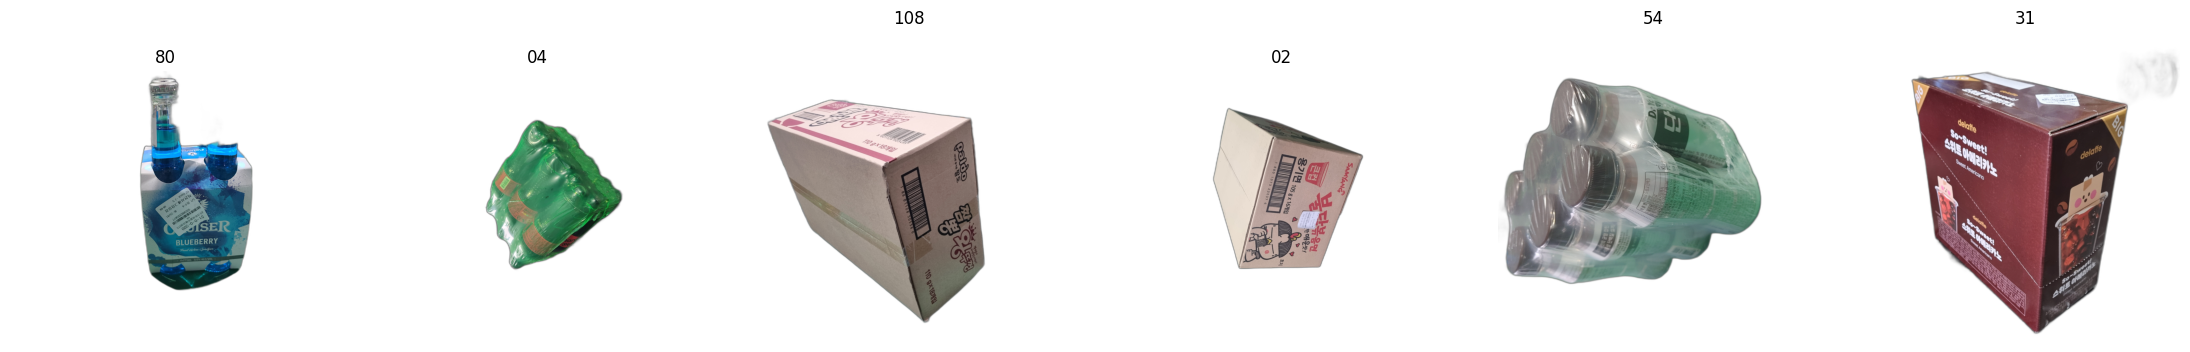


Running Time: 37.22초


In [ ]:
# 최종 전처리함수로 선정
showimagesinarow(nukki=True)

In [ ]:
# 전체 이미지에는 약 30분 소요
# 예선 당일에는 아래의 주석처리된 코드를 해제하고 현재 주석해제된 코드는 주석처리 후 코드 실행!

#allimagepreprocessing(
#    dataurl=pr_train,
#    trainortest = 'train')
allimagepreprocessing(
    dataurl=train_dir,
    trainortest = 'train')

Show image progress:  49%|===================                     | 205/418 [02:37<02:46,  1.28it/s]


Ram 용량 초과로 일부의 이미지를 미리 연산 중입니다!

Running cnt: 206개의 이미지 연산

Running Time: 816.86초


Show image progress:  49%|=================                   | 206/418 [16:15<14:29:16, 246.02s/it]


Ram 용량 초과로 일부의 이미지를 연산하였으며 남은 이미지를 처리중입니다! 잠시만 기다려주세요!


Show image progress:  97%|======================================  | 407/418 [18:29<00:08,  1.25it/s]


Ram 용량 초과로 일부의 이미지를 미리 연산 중입니다!


Show image progress:  98%|====================================== | 408/418 [32:09<41:05, 246.55s/it]


Running cnt: 202개의 이미지 연산

Running Time: 818.78초

Ram 용량 초과로 일부의 이미지를 연산하였으며 남은 이미지를 처리중입니다! 잠시만 기다려주세요!


Show image progress: 100%|========================================| 418/418 [32:16<00:00,  4.63s/it]



Running cnt: 10개의 이미지 연산

Running Time: 35.99초

Running cnt: 418개의 이미지 연산완료!


In [ ]:
# 전체 이미지에는 약 10분 소요
# 예선 당일에는 아래의 주석처리된 코드를 해제하고 현재 주석해제된 코드는 주석처리 후 코드 실행!

#allimagepreprocessing(
#    dataurl=pr_test,
#    trainortest = 'test')
allimagepreprocessing(
    dataurl=test_dir,
    trainortest = 'test')

Show image progress:  57%|======================                  | 102/180 [01:07<01:17,  1.00it/s]


Ram 용량 초과로 일부의 이미지를 미리 연산 중입니다!

Running cnt: 103개의 이미지 연산

Running Time: 378.97초

Ram 용량 초과로 일부의 이미지를 연산하였으며 남은 이미지를 처리중입니다! 잠시만 기다려주세요!


Show image progress: 100%|========================================| 180/180 [08:17<00:00,  2.76s/it]



Running cnt: 77개의 이미지 연산

Running Time: 282.68초

Running cnt: 180개의 이미지 연산완료!
